## Performing Multiple Linear Regression on Concrete Dataset:-
Steps to be followed:-
- Reading and Understanding the dataset.
- Visualizing the dataset
- Preparing the data for the modelling(for train_test_split,rescaling etc.)
- Training the model
- Residual Analysis
- Prediction and Evaluation on the test data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel(r"C:\Users\avina\OneDrive\Desktop\Data\Concrete_Data.xls")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.shape

(1030, 9)

In [4]:
df.info

<bound method DataFrame.info of       Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                       

In [5]:
df.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [6]:
df = df.rename( columns = {'Cement (component 1)(kg in a m^3 mixture)':'Cement','Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnace_Slag','Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash','Water  (component 4)(kg in a m^3 mixture)':'Water',
                     'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer','Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate'
                     ,'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate','Age (day)':'Age','Concrete compressive strength(MPa, megapascals) ':'CCS'})

In [7]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


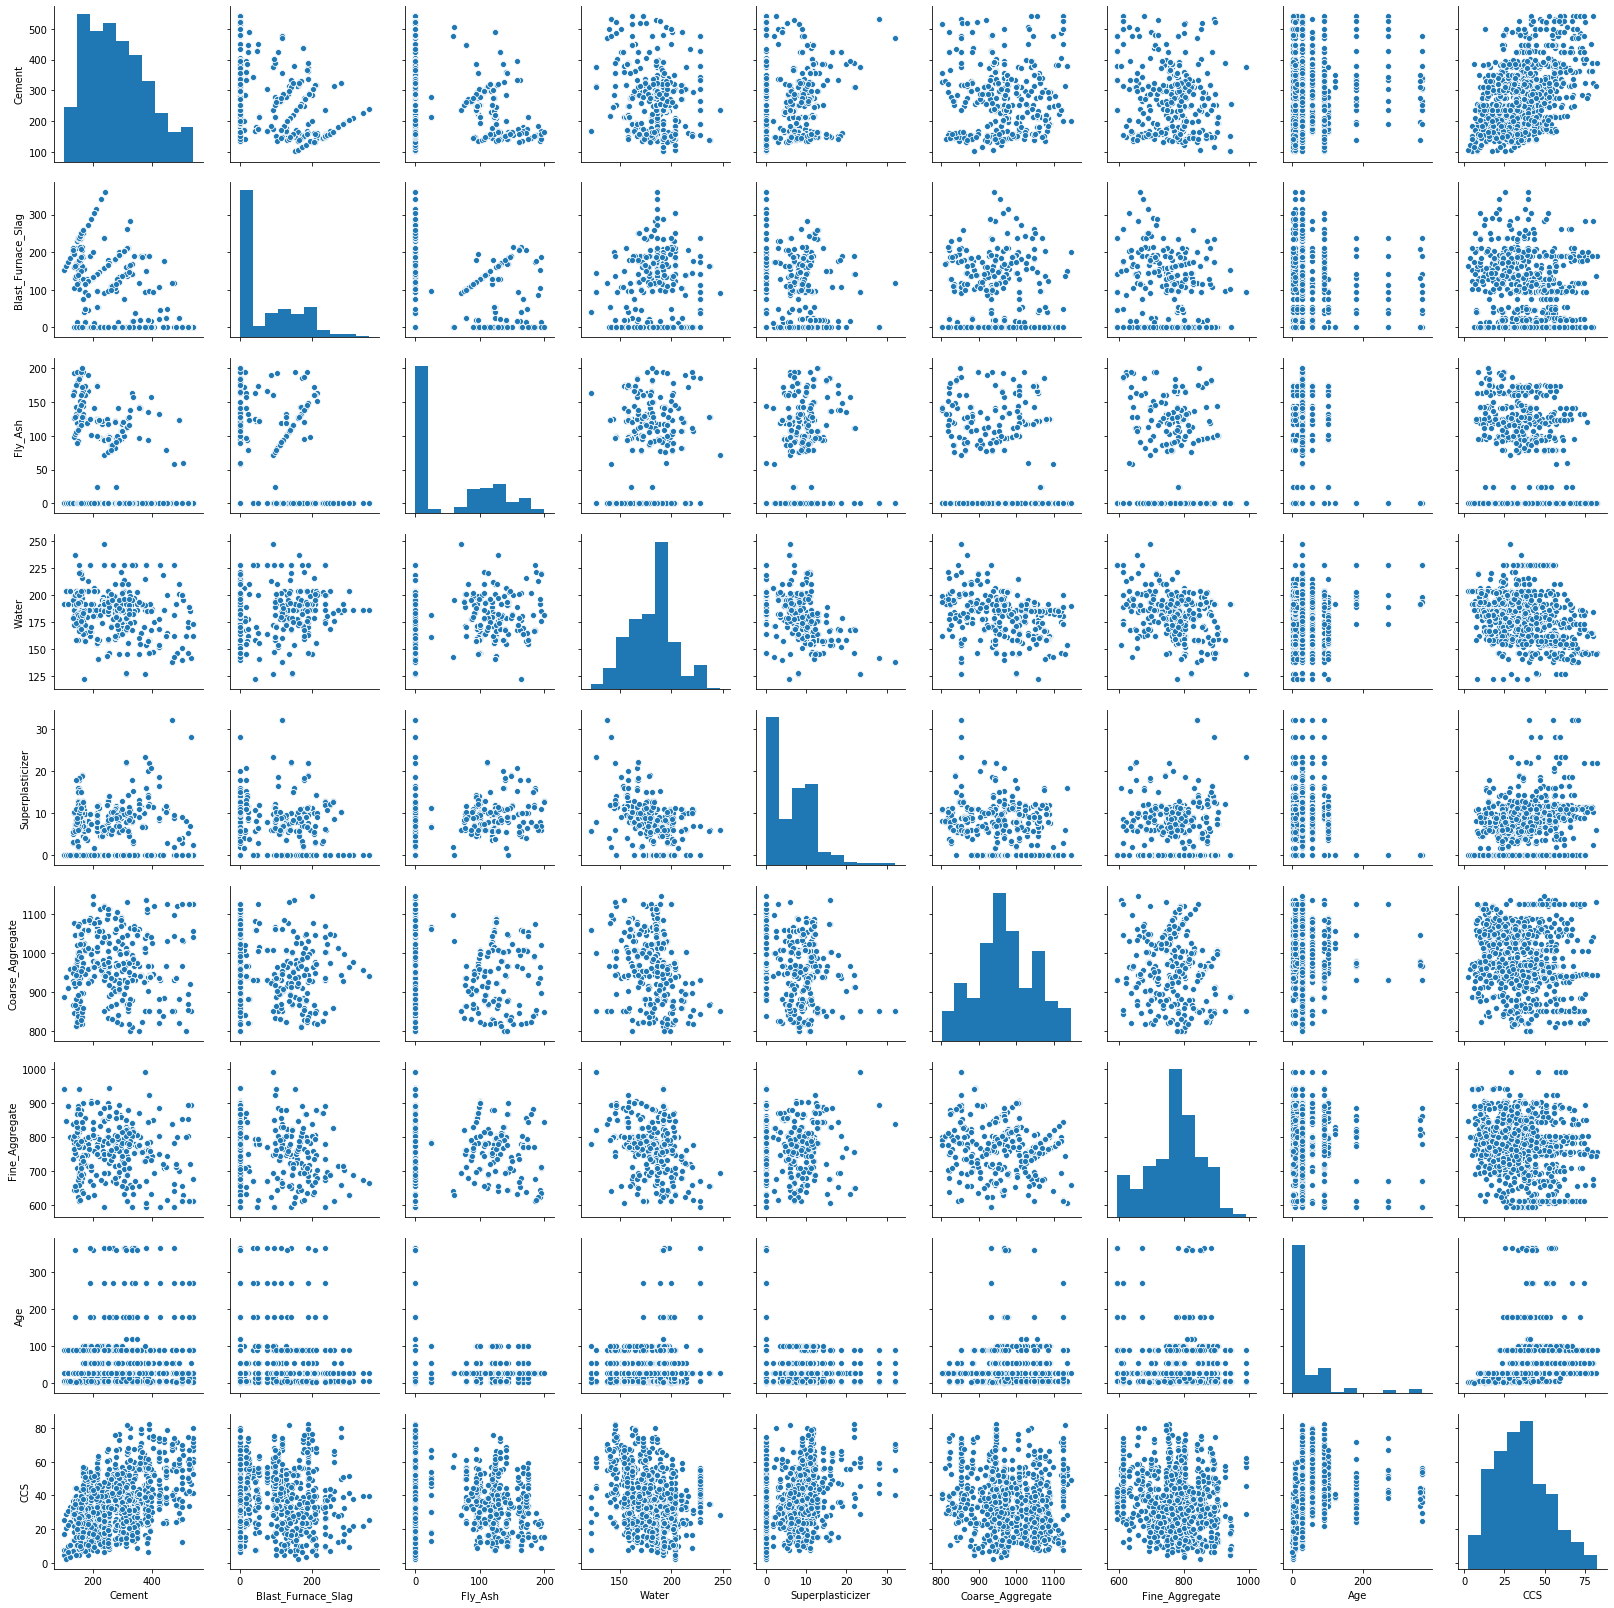

In [8]:
#visualizing the numeric variables

sns.pairplot(df)

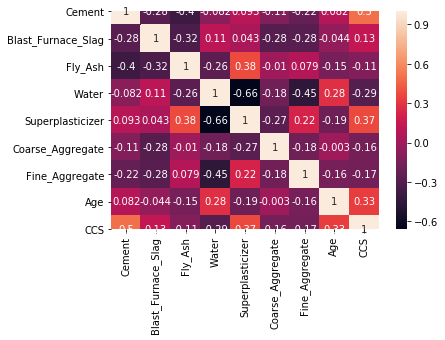

In [9]:
sns.heatmap(df.corr(),annot = True)

In [10]:
df.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CCS
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast_Furnace_Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
CCS,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [11]:
#Splitting the data
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)
df_train.shape,df_test.shape


((721, 9), (309, 9))

In [12]:
features = df.columns.tolist()
features


['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age',
 'CCS']

In [13]:
#normalizing  the dataset

Scaler = MinMaxScaler()

df_train[features] = Scaler.fit_transform(df_train[features])
df_train.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CCS
282,0.341027,0.0,0.59135,0.532535,0.197205,0.682268,0.410763,0.151099,0.427408
599,0.541096,0.0,0.00000,0.600798,0.000000,0.501050,0.469142,0.016484,0.232163
252,0.337900,0.0,0.47845,0.524311,0.171739,0.467627,0.670271,0.151099,0.448453
193,0.300936,0.0,0.47290,0.607904,0.141832,0.438164,0.647667,0.271978,0.401467
644,0.566210,0.0,0.00000,0.512974,0.000000,0.747075,0.441545,0.074176,0.398203


In [14]:
Y_train = df_train.pop('CCS')

X_train = df_train

In [15]:
#building the model with feature 'cement'

#adding a constant
X_train_sm = sm.add_constant(X_train['Cement'])



In [16]:
#creating a model
lr = sm.OLS(Y_train,X_train_sm)
#fitting the model
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     241.4
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           3.81e-47
Time:                        00:14:09   Log-Likelihood:                 228.04
No. Observations:                 721   AIC:                            -452.1
Df Residuals:                     719   BIC:                            -442.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2408      0.013     18.325      0.000       0.215       0.267
Cement         0.4240      0.027     15.536      0.000       0.370       0.478
==============================================================================
Omnibus:                       20.670   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.691
Skew:                           0.207   Prob(JB):                      0.00106
Kurtosis:                       2.466   Cond. No.                         4.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#adding another variable 'Age'
X_train_sm = X_train[['Cement','Age']]
X_train_sm = sm.add_constant(X_train_sm)
#building the model
lr = sm.OLS(Y_train,X_train_sm)
#fitting the model
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     184.8
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.77e-65
Time:                        00:14:09   Log-Likelihood:                 273.42
No. Observations:                 721   AIC:                            -540.8
Df Residuals:                     718   BIC:                            -527.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2028      0.013     15.676      0.000       0.177       0.228
Cement         0.4120      0.026     16.047      0.000       0.362       0.462
Age            0.3409      0.035      9.814      0.000       0.273       0.409
==============================================================================
Omnibus:                       19.946   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.206
Skew:                           0.286   Prob(JB):                     0.000303
Kurtosis:                       2.539   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#adding another variable 'Superplasticizer'
X_train_sm = X_train[['Cement','Age','Superplasticizer']]
X_train_sm = sm.add_constant(X_train_sm)
#building the model
lr = sm.OLS(Y_train,X_train_sm)
#fitting the model
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     231.0
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          7.82e-105
Time:                        00:14:09   Log-Likelihood:                 367.48
No. Observations:                 721   AIC:                            -727.0
Df Residuals:                     717   BIC:                            -708.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1219      0.013      9.647      0.000       0.097       0.147
Cement               0.3842      0.023     16.979      0.000       0.340       0.429
Age                  0.4299      0.031     13.818      0.000       0.369       0.491
Superplasticizer     0.4294      0.029     14.620      0.000       0.372       0.487
==============================================================================
Omnibus:                        4.417   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                4.265
Skew:                           0.149   Prob(JB):                        0.119
Kurtosis:                       2.769   Cond. No.                         6.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#adding another variable 'Blast_furnace_slag'
X_train_sm = X_train[['Cement','Age','Superplasticizer','Blast_Furnace_Slag']]
X_train_sm = sm.add_constant(X_train_sm)
#building the model
lr = sm.OLS(Y_train,X_train_sm)
#fitting the model
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     211.1
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          1.46e-119
Time:                        00:14:09   Log-Likelihood:                 404.54
No. Observations:                 721   AIC:                            -799.1
Df Residuals:                     716   BIC:                            -776.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0606      0.014      4.361      0.000       0.033       0.088
Cement                 0.4432      0.023     19.672      0.000       0.399       0.487
Age                    0.4307      0.030     14.565      0.000       0.373       0.489
Superplasticizer       0.4143      0.028     14.810      0.000       0.359       0.469
Blast_Furnace_Slag     0.1971      0.022      8.806      0.000       0.153       0.241
==============================================================================
Omnibus:                        1.819   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.839
Skew:                           0.082   Prob(JB):                        0.399
Kurtosis:                       2.815   Cond. No.                         7.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#adding all the variables in the model
#X_train_sm = X_train[features]
X_train_sm = sm.add_constant(X_train)
#building the model
lr = sm.OLS(Y_train,X_train_sm)
#fitting the model
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          4.69e-137
Time:                        00:14:09   Log-Likelihood:                 456.09
No. Observations:                 721   AIC:                            -894.2
Df Residuals:                     712   BIC:                            -853.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1015      0.126     -0.806      0.421      -0.349       0.146
Cement                 0.6627      0.056     11.894      0.000       0.553       0.772
Blast_Furnace_Slag     0.4332      0.054      7.967      0.000       0.326       0.540
Fly_Ash                0.2267      0.037      6.056      0.000       0.153       0.300
Water                 -0.1822      0.078     -2.349      0.019      -0.334      -0.030
Superplasticizer       0.1394      0.044      3.191      0.001       0.054       0.225
Coarse_Aggregate       0.0884      0.047      1.870      0.062      -0.004       0.181
Fine_Aggregate         0.1133      0.064      1.760      0.079      -0.013       0.240
Age                    0.4923      0.028     17.319      0.000       0.437       0.548
==============================================================================
Omnibus:                        2.333   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                2.407
Skew:                          -0.132   Prob(JB):                        0.300
Kurtosis:                       2.898   Cond. No.                         53.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we are going to check:-
- p-values of respective features
- VIF value
And,we try to eliminate features one-by-one.

In [21]:
#Checking on VIF:-
#creating a dataframe
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending =False)
vif

,features,VIF
3,Water,10.53
0,Cement,5.93
4,Superplasticizer,5.11
6,Fine_Aggregate,4.62
5,Coarse_Aggregate,4.45
2,Fly_Ash,3.44
1,Blast_Furnace_Slag,2.82
7,Age,1.66


Situations We could have:-
- High p-value, High-VIF(drop for sure)
- High p-value, low-VIF - here first remove high p-valued variable and then build a model and check on VIF
- Low p-value, high-VIF - here we remove these variables after the first one above
- Low p-value, Low VIF (keep for sure)

In [31]:
#removing the variabble 'Fine Aggregate'
X = X_train.drop(['Fine_Aggregate'],axis=1)
X_train_sm = sm.add_constant(X)
#building the model
lr = sm.OLS(Y_train,X_train_sm)
#fitting the model
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     153.1
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          1.70e-137
Time:                        00:27:18   Log-Likelihood:                 454.53
No. Observations:                 721   AIC:                            -893.1
Df Residuals:                     713   BIC:                            -856.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1078      0.042      2.594      0.010       0.026       0.189
Cement                 0.5778      0.028     20.707      0.000       0.523       0.633
Blast_Furnace_Slag     0.3507      0.028     12.689      0.000       0.296       0.405
Fly_Ash                0.1750      0.023      7.524      0.000       0.129       0.221
Water                 -0.2937      0.045     -6.559      0.000      -0.382      -0.206
Superplasticizer       0.1231      0.043      2.879      0.004       0.039       0.207
Coarse_Aggregate       0.0187      0.026      0.723      0.470      -0.032       0.069
Age                    0.4897      0.028     17.224      0.000       0.434       0.545
==============================================================================
Omnibus:                        2.952   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                3.025
Skew:                          -0.144   Prob(JB):                        0.220
Kurtosis:                       2.865   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Checking on VIF:-
#creating a dataframe
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending =False)
vif

,features,VIF
3,Water,8.90
0,Cement,5.85
4,Superplasticizer,4.20
5,Coarse_Aggregate,4.08
2,Fly_Ash,3.42
1,Blast_Furnace_Slag,2.72
6,Age,1.65


In [34]:
#removing the feature 'Coarse_Aggregate'
X = X.drop(['Coarse_Aggregate'],axis=1)
X_train_sm = sm.add_constant(X)
#building the model
lr = sm.OLS(Y_train,X_train_sm)
#fitting the model
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     178.7
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          1.58e-138
Time:                        00:29:35   Log-Likelihood:                 454.26
No. Observations:                 721   AIC:                            -894.5
Df Residuals:                     714   BIC:                            -862.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1302      0.028      4.704      0.000       0.076       0.185
Cement                 0.5734      0.027     21.069      0.000       0.520       0.627
Blast_Furnace_Slag     0.3449      0.026     13.050      0.000       0.293       0.397
Fly_Ash                0.1727      0.023      7.498      0.000       0.128       0.218
Water                 -0.3083      0.040     -7.719      0.000      -0.387      -0.230
Superplasticizer       0.1113      0.040      2.816      0.005       0.034       0.189
Age                    0.4909      0.028     17.304      0.000       0.435       0.547
==============================================================================
Omnibus:                        2.748   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.824
Skew:                          -0.141   Prob(JB):                        0.244
Kurtosis:                       2.879   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Checking on VIF:-
#creating a dataframe
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending =False)
vif

,features,VIF
3,Water,8.04
0,Cement,5.45
4,Superplasticizer,4.20
2,Fly_Ash,3.25
1,Blast_Furnace_Slag,2.72
5,Age,1.65


In [36]:
#removing the feature 'Water' because of high VIF
X = X.drop(['Water'],axis=1)
X_train_sm = sm.add_constant(X)
#building the model
lr = sm.OLS(Y_train,X_train_sm)
#fitting the model
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     187.2
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          2.62e-127
Time:                        00:31:22   Log-Likelihood:                 425.37
No. Observations:                 721   AIC:                            -838.7
Df Residuals:                     715   BIC:                            -811.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0288      0.019     -1.495      0.135      -0.067       0.009
Cement                 0.5594      0.028     19.807      0.000       0.504       0.615
Blast_Furnace_Slag     0.2989      0.027     11.160      0.000       0.246       0.351
Fly_Ash                0.1555      0.024      6.520      0.000       0.109       0.202
Superplasticizer       0.2974      0.033      9.129      0.000       0.233       0.361
Age                    0.4439      0.029     15.402      0.000       0.387       0.500
==============================================================================
Omnibus:                        1.715   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.648
Skew:                           0.045   Prob(JB):                        0.439
Kurtosis:                       2.784   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Checking on VIF:-
#creating a dataframe
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending =False)
vif

,features,VIF
3,Superplasticizer,2.91
0,Cement,2.15
2,Fly_Ash,1.89
4,Age,1.46
1,Blast_Furnace_Slag,1.43


## Residual Analysis:-


In [40]:
#prediction on Y_train data
Y_train_pred = lr_model.predict(X_train_sm)
Y_train_pred

282    0.379687
599    0.281263
252    0.352808
193    0.376028
644    0.320921
         ...   
802    0.306871
53     0.400970
350    0.372655
79     0.782429
792    0.724497
Length: 721, dtype: float64

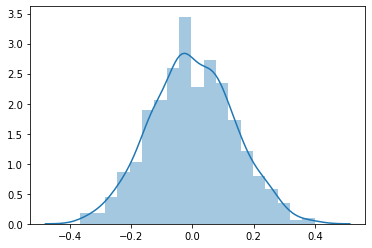

In [42]:
residual = Y_train - Y_train_pred
sns.distplot(residual)

## Predicting and Evaluating on Test set

In [43]:
#Normalizing the test data

Scaler = MinMaxScaler()

df_test[features] = Scaler.fit_transform(df_test[features])
df_test.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CCS
173,0.494977,0.672256,0.000000,0.295346,0.507092,0.148547,0.718515,0.247253,0.823134
134,0.594977,0.597912,0.000000,0.375381,0.411348,0.417733,0.405921,0.074176,0.864581
822,0.502283,0.000000,0.000000,0.706829,0.000000,0.502907,0.516809,0.074176,0.267077
264,0.251142,0.000000,0.623588,0.324054,0.278014,0.826744,0.515655,0.005495,0.193740
479,0.785388,0.075925,0.394803,0.350152,0.412766,0.482558,0.296036,0.016484,0.433403


In [44]:
df_test.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CCS
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.390834,0.246764,0.289020,0.503598,0.229070,0.499035,0.464905,0.114905,0.403981
std,0.231890,0.268372,0.324773,0.191268,0.202022,0.228470,0.197590,0.162024,0.226560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.201689,0.000000,0.000000,0.358852,0.000000,0.374419,0.377070,0.016484,0.232418
50%,0.342466,0.133122,0.000000,0.517181,0.248227,0.482558,0.466859,0.074176,0.390883
75%,0.563927,0.465675,0.599700,0.611135,0.367021,0.688953,0.589563,0.151099,0.539790
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
Y_test = df_test.pop('CCS')
X_test = df_test

In [47]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
173,1.0,0.494977,0.672256,0.000000,0.295346,0.507092,0.148547,0.718515,0.247253
134,1.0,0.594977,0.597912,0.000000,0.375381,0.411348,0.417733,0.405921,0.074176
822,1.0,0.502283,0.000000,0.000000,0.706829,0.000000,0.502907,0.516809,0.074176
264,1.0,0.251142,0.000000,0.623588,0.324054,0.278014,0.826744,0.515655,0.005495
479,1.0,0.785388,0.075925,0.394803,0.350152,0.412766,0.482558,0.296036,0.016484


In [48]:
X_test_sm = X_test_sm.drop(['Coarse_Aggregate','Fine_Aggregate','Water'],axis=1)
X_test_sm.head()

,const,Cement,Blast_Furnace_Slag,Fly_Ash,Superplasticizer,Age
173,1.0,0.494977,0.672256,0.000000,0.507092,0.247253
134,1.0,0.594977,0.597912,0.000000,0.411348,0.074176
822,1.0,0.502283,0.000000,0.000000,0.000000,0.074176
264,1.0,0.251142,0.000000,0.623588,0.278014,0.005495
479,1.0,0.785388,0.075925,0.394803,0.412766,0.016484


In [49]:
#predicting on test set
Y_test_pred = lr_model.predict(X_test_sm)

In [50]:
#evaluate the model
#computing r-squared
r2_score(y_true=Y_test  ,y_pred=Y_test_pred )

0.5787098688561739

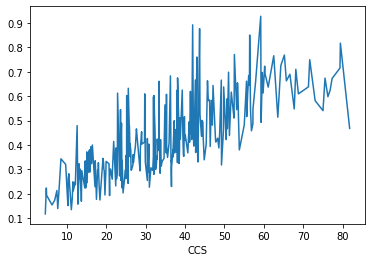

In [51]:
sns.lineplot(x=df['CCS'],y= Y_test_pred,)